In [1]:
!pip install dask
!pip install nltk
!pip3 install "dask[complete]"
!pip install "dask[dataframe]" --upgrade
!pip install "dask[distributed]" --upgrade
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [18]:
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import word_tokenize
from nltk.corpus import state_union
from nltk.tag import pos_tag
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt
import collections, re
import string
import pylab as plt
import nltk
from wordcloud import WordCloud


nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
import dask.dataframe as dd
from dask.distributed import Client

client = Client(n_workers=4)
import pandas as pd

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/aditya/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /home/aditya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/home/aditya/.local/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 35591 instead
  warnings.warn(


In [3]:
pwd

'/home/aditya/euvio challenge'

In [16]:
# df =pd.read_csv("/home/aditya/euvio challenge/Eluvio_DS_Challenge.csv")

In [21]:
# df.dtypes


time_created     int64
date_created    object
up_votes         int64
down_votes       int64
title           object
over_18           bool
author          object
category        object
dtype: object

In [17]:
# df.columns

Index(['time_created', 'date_created', 'up_votes', 'down_votes', 'title',
       'over_18', 'author', 'category'],
      dtype='object')

In [30]:
# df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


In [72]:
from dask import dataframe as dd
df = dd.read_csv(
    '/home/aditya/euvio challenge/Eluvio_DS_Challenge.csv', 
    delimiter=',',
    blocksize=64000000 # = 64 Mb chunks
)


In [5]:
df.dtypes


time_created     int64
date_created    object
up_votes         int64
down_votes       int64
title           object
over_18           bool
author          object
category        object
dtype: object

In [6]:
df.describe(include="all").compute()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
unique,NaN,3223,NaN,NaN,500720,2,85838,1
count,5.092360e+05,509236,509236.000000,509236.0,509236,509236,509236,509236
top,NaN,2015-11-24,NaN,NaN,Brutality of Syrian Rebels Posing Dilemma in West,False,davidreiss666,worldnews
freq,NaN,458,NaN,NaN,6,508916,8897,509236
mean,1.380240e+09,NaN,112.236283,0.0,NaN,NaN,NaN,NaN
std,7.090436e+07,NaN,541.694675,0.0,NaN,NaN,NaN,NaN
min,1.201232e+09,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,1.314816e+09,NaN,2.000000,0.0,NaN,NaN,NaN,NaN
50%,1.373656e+09,NaN,5.000000,0.0,NaN,NaN,NaN,NaN
75%,1.407426e+09,NaN,18.000000,0.0,NaN,NaN,NaN,NaN


In [7]:
raw_data=df.copy()
df = raw_data.drop('category', axis=1).copy()

In [8]:
type(df)

dask.dataframe.core.DataFrame

In [119]:
# we see category is "worldnews" for all the rows, and so we should remove it 

In [9]:
df['date_created'] = dd.to_datetime(df['date_created'])
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans


In [10]:
df['total_votes']=df['up_votes']+ df['down_votes']

In [11]:
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,total_votes
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,3
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,2
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,3
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,1
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,4


In [12]:
df['title_length'] = df['title'].apply(lambda x : len(x.split(' ')),  meta=('title', 'int64'))

In [13]:
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,total_votes,title_length
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,3,5
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,2,4
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,3,6
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,1,8
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,4,7


## Top words for which upvotes>500

In [14]:
df1=df[df.up_votes>500]
print(df1.head(5))

      time_created date_created  up_votes  down_votes  \
1416    1205772213   2008-03-17       515           0   
1535    1205885272   2008-03-19       961           0   
8661    1212945227   2008-06-08       735           0   
8740    1213018944   2008-06-09       594           0   
8845    1213112499   2008-06-10      1452           0   

                                                  title  over_18  \
1416   Our dollar is worth maybe zero over here  - A...    False   
1535  France calls for a boycott of the Olympics cer...    False   
8661           United States quits Human Rights Council    False   
8740           Pentagon blocked Cheney s attack on Iran    False   
8845                    BBC uncovers lost Iraq billions    False   

                author  total_votes  title_length  
1416    PintOfGuinness          515            15  
1535  JewishPropaganda          961            11  
8661         reflibman          735             6  
8740           StoneMe          594     

In [15]:
df1['title'] = df1['title'].str.lower()


In [16]:
filtered_words=df1['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words('english')]),  meta=('title', 'object')).compute()
bagsofwords_1 = [ collections.Counter(re.findall(r'\w+', txt)) for txt in filtered_words]
sumbags = sum(bagsofwords_1, collections.Counter())

In [17]:
sumbags

Counter({'dollar': 50,
         'worth': 102,
         'maybe': 8,
         'zero': 29,
         'american': 285,
         'tourist': 40,
         'amsterdam': 22,
         'france': 386,
         'calls': 359,
         'boycott': 40,
         'olympics': 102,
         'ceremony': 15,
         'tibet': 13,
         'united': 299,
         'states': 252,
         'quits': 17,
         'human': 414,
         'rights': 407,
         'council': 80,
         'pentagon': 50,
         'blocked': 56,
         'cheney': 9,
         'attack': 453,
         'iran': 369,
         'bbc': 197,
         'uncovers': 9,
         'lost': 127,
         'iraq': 308,
         'billions': 64,
         'us': 1555,
         'pakistan': 214,
         'last': 332,
         'night': 83,
         'fury': 13,
         'deadly': 77,
         'strike': 152,
         'took': 81,
         'two': 544,
         'planned': 54,
         'attacks': 236,
         'germany': 467,
         'persuade': 7,
         'majority': 

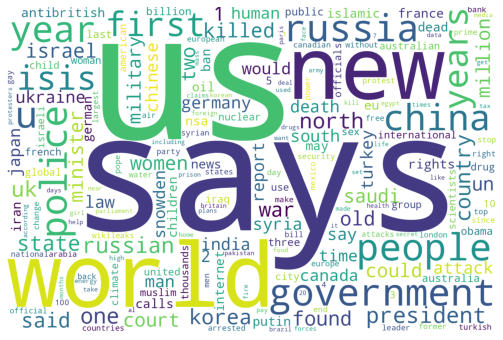

In [30]:

wordcloud = WordCloud(background_color='white',
                      width=1500,
                      height=1000
                      ).generate_from_frequencies(sumbags)
# use .generate(space_separated_string) - to generate cloud from text

plt.figure(figsize=(9,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## compute effect of the time on total votes

In [31]:
df.total_votes.nlargest(2000).compute()


377200    21253
391415    13435
56557     13244
391318    12333
390252    11288
          ...  
19902      4715
296343     4714
315387     4713
257402     4712
8148       4712
Name: total_votes, Length: 2000, dtype: int64

In [32]:
bestData = df.nlargest(2000, 'total_votes').compute()

In [33]:
def getDT(timestamp):
    secondOfDay = int(timestamp)%(24*60*60)
    return secondOfDay/(60*60)

df['hours_of_day'] = df['time_created'].apply(getDT)

bestData = df.nlargest(1000, 'total_votes').compute()

/home/aditya/.local/lib/python3.8/site-packages/dask/dataframe/core.py:3519: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('time_created', 'float64'))

  warnings.warn(meta_warning(meta))


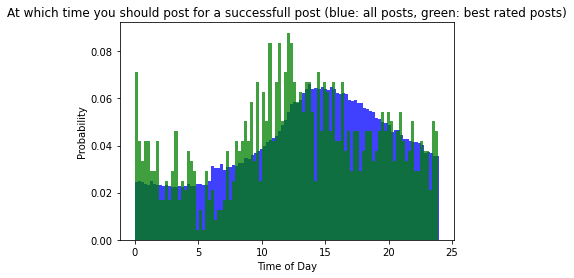

In [34]:
plt.hist(df['hours_of_day'], 100, facecolor='blue', density=True, alpha=0.75)
plt.hist(bestData['hours_of_day'], 100, facecolor='green', density=True, alpha=0.75)

plt.xlabel('Time of Day')
plt.ylabel('Probability')
plt.title('At which time you should post for a successfull post (blue: all posts, green: best rated posts)')

plt.show()

# Effect of over 18 posts on total votes

(0.0, 10000.0)

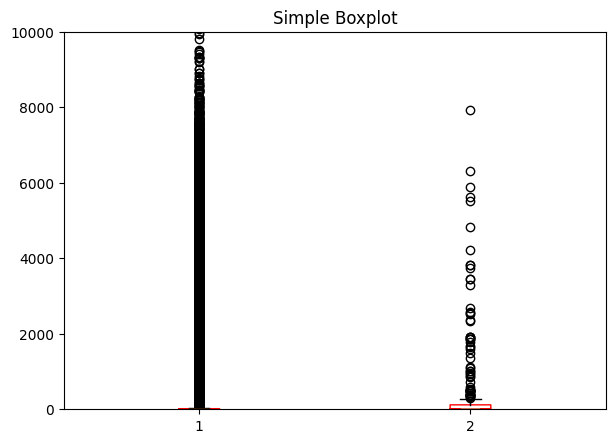

In [83]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.boxplot([df[df['over_18']==False]['up_votes'], df[df['over_18']==True]['up_votes']] ,notch=True, boxprops=dict(color='red'))
plt.title('Simple Boxplot');
axes=plt.gca()
axes.set_ylim([0,10000])
